#Project : CAR PRICE PREDICTION
DOMAIN : MACHINE LEARNING USING PYTHON
Importing necessary libraries

In [1]:
# for reading dataset file
import pandas as pd

# for data visualizations
import seaborn as sns


# for numerical calculations
import numpy as np

# for ploting graph
from matplotlib import pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


# for SVC model
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

In [36]:
# to read dataset into notebook
df = pd.read_csv('car_data3.csv')
# to display top five rows from table.
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0


In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df['current_year'] = 2020
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0,2020


In [5]:
df['Age_Car'] = df['current_year'] - df['Year']

In [6]:
df['Price']=df['Present_Price']-df['Selling_Price']

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,Age_Car,Price
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0,2020,6,224000
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0,2020,7,479000
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0,2020,3,260000
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0,2020,9,130000
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0,2020,6,227000


In [8]:
df.drop(['Year', 'current_year'], axis = 1, inplace = True)

In [9]:
df.drop(['Selling_Price', 'Present_Price'], axis = 1, inplace = True)

In [10]:
df.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car,Price
0,ritz,27000,Petrol,Dealer,Manual,0,6,224000
1,sx4,43000,Diesel,Dealer,Manual,0,7,479000
2,ciaz,6900,Petrol,Dealer,Manual,0,3,260000
3,wagon r,5200,Petrol,Dealer,Manual,0,9,130000
4,swift,42450,Diesel,Dealer,Manual,0,6,227000


In [11]:
le=LabelEncoder()

In [12]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car,Price
0,ritz,27000,2,Dealer,Manual,0,6,224000
1,sx4,43000,1,Dealer,Manual,0,7,479000
2,ciaz,6900,2,Dealer,Manual,0,3,260000
3,wagon r,5200,2,Dealer,Manual,0,9,130000
4,swift,42450,1,Dealer,Manual,0,6,227000
...,...,...,...,...,...,...,...,...
195,city,33988,1,Dealer,Manual,0,4,210000
196,brio,60000,2,Dealer,Manual,0,5,190000
197,city,87934,2,Dealer,Manual,0,11,765000
198,city,9000,1,Dealer,Manual,0,3,100000


In [13]:
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car,Price
0,ritz,27000,2,0,Manual,0,6,224000
1,sx4,43000,1,0,Manual,0,7,479000
2,ciaz,6900,2,0,Manual,0,3,260000
3,wagon r,5200,2,0,Manual,0,9,130000
4,swift,42450,1,0,Manual,0,6,227000
...,...,...,...,...,...,...,...,...
195,city,33988,1,0,Manual,0,4,210000
196,brio,60000,2,0,Manual,0,5,190000
197,city,87934,2,0,Manual,0,11,765000
198,city,9000,1,0,Manual,0,3,100000


In [14]:
df['Transmission']=le.fit_transform(df['Transmission'])
df

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car,Price
0,ritz,27000,2,0,1,0,6,224000
1,sx4,43000,1,0,1,0,7,479000
2,ciaz,6900,2,0,1,0,3,260000
3,wagon r,5200,2,0,1,0,9,130000
4,swift,42450,1,0,1,0,6,227000
...,...,...,...,...,...,...,...,...
195,city,33988,1,0,1,0,4,210000
196,brio,60000,2,0,1,0,5,190000
197,city,87934,2,0,1,0,11,765000
198,city,9000,1,0,1,0,3,100000


In [15]:
df['Car_Name']=le.fit_transform(df['Car_Name'])
df

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car,Price
0,29,27000,2,0,1,0,6,224000
1,32,43000,1,0,1,0,7,479000
2,7,6900,2,0,1,0,3,260000
3,35,5200,2,0,1,0,9,130000
4,31,42450,1,0,1,0,6,227000
...,...,...,...,...,...,...,...,...
195,8,33988,1,0,1,0,4,210000
196,5,60000,2,0,1,0,5,190000
197,8,87934,2,0,1,0,11,765000
198,8,9000,1,0,1,0,3,100000


In [16]:
df.drop(['Owner'],axis=1 , inplace=True)

In [17]:
df.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age_Car,Price
0,29,27000,2,0,1,6,224000
1,32,43000,1,0,1,7,479000
2,7,6900,2,0,1,3,260000
3,35,5200,2,0,1,9,130000
4,31,42450,1,0,1,6,227000


In [18]:
# Copying required columns from table.
my_col=['Car_Name','Price','Kms_Driven','Fuel_Type','Transmission','Seller_Type','Age_Car']
df=df[my_col]
df.head()

,Car_Name,Price,Kms_Driven,Fuel_Type,Transmission,Seller_Type,Age_Car
0,29,224000,27000,2,1,0,6
1,32,479000,43000,1,1,0,7
2,7,260000,6900,2,1,0,3
3,35,130000,5200,2,1,0,9
4,31,227000,42450,1,1,0,6


In [19]:
X=df.drop('Price',axis='columns')
y=df.Price

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6)

# implementing randomforestclassifier 

In [21]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [22]:
model.predict(X_test)

array([  81000,  335000,  454000,   45000,   45000,  243000,  137000,
        310000, 1246000,  293000,  153000,  335000, 2912000,  918000,
        285000,  445000,  345000,  490000,   15000,  243000,  525000,
        144000,  520000, 1019000,  150000,  244000,   14000,  354000,
         47000,  510000,  273000,  369000,   45000,  403000,  369000,
        918000,   15000,  137000,  798000,  144000,  369000,   15000,
        335000, 1246000,  445000,  345000,  345000,  130000,  335000,
        320000,  239000, 1116000,  490000, 1116000,  177000,  335000,
        369000,  190000,  354000,  225000,   45000,  110000,  590000,
        525000, 1019000,  798000,  484000,  144000,  525000,  229000,
        335000,   96000,  142000,   16000, 1116000,  345000,   81000,
        188000, 1116000,  144000,  153000,  369000, 1019000,  335000,
        320000,  369000, 1144000,  188000,  520000,  150000,   47000,
        229000,  765000,  403000, 1144000, 1144000,  188000,  345000,
        142000, 1246

In [23]:
model.score(X_test,y_test)

0.008333333333333333

In [24]:
y_predicted=model.predict(X_test)

In [25]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
df.head(50)

,Car_Name,Price,Kms_Driven,Fuel_Type,Transmission,Seller_Type,Age_Car
0,29,224000,27000,2,1,0,6
1,32,479000,43000,1,1,0,7
2,7,260000,6900,2,1,0,3
3,35,130000,5200,2,1,0,9
4,31,227000,42450,1,1,0,6
5,34,58000,2071,1,1,0,2
6,7,137000,18796,2,1,0,5
7,30,211000,33429,1,1,0,5
8,7,14000,20273,1,1,0,4
9,7,147000,42367,1,1,0,5


In [27]:
df[51:100]

,Car_Name,Price,Kms_Driven,Fuel_Type,Transmission,Seller_Type,Age_Car
51,20,761000,40000,1,0,0,5
52,25,177000,15000,1,0,0,3
53,20,1461000,135000,1,0,1,7
54,25,746000,90000,2,1,1,15
55,10,1144000,70000,2,0,0,11
56,16,277000,40534,2,1,0,5
57,10,1379000,50000,2,1,0,10
58,17,270000,39485,2,1,0,6
59,20,1597000,41000,1,0,0,6
60,10,1166000,40001,2,1,0,7


In [28]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

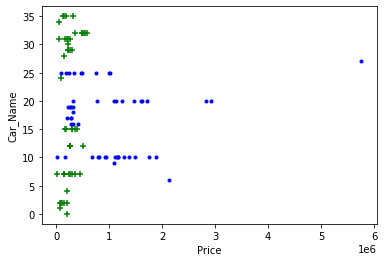

In [29]:
#plotting scatter plot
plt.xlabel('Price')
plt.ylabel('Car_Name')
plt.scatter(df0['Price'], df0['Car_Name'], color="green", marker='+')
plt.scatter(df1['Price'], df1['Car_Name'], color="blue", marker='.')

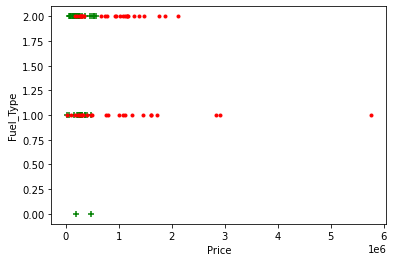

In [30]:
#plotting scatter plot
plt.xlabel('Price')
plt.ylabel('Fuel_Type')
plt.scatter(df0['Price'], df0['Fuel_Type'], color="green", marker='+')
plt.scatter(df1['Price'], df1['Fuel_Type'], color="red", marker='.')

# implementing SVM model

In [31]:
model=SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [33]:
model.predict(X_test)

array([  20000,  304000,  310000,  520000,  130000,  304000,   45000,
        304000,  304000,  304000,   20000,  304000, 2912000,  310000,
        304000,  304000,  310000,  304000,   20000,  304000,  310000,
        310000,  520000,  454000,  130000,   45000,  520000,  304000,
         20000,  310000,  520000,  304000,   20000,  310000,  310000,
        310000,   45000,  130000,  304000,  304000,  304000,  520000,
        520000,  304000,  520000,  520000,  304000,  520000,  304000,
        304000,  520000,  304000,  304000,  310000,   20000,  304000,
        310000,  520000,  304000,   45000,   20000,   20000,  304000,
        304000, 2912000,  304000,  304000,  310000,  304000,  304000,
        304000,  304000,  520000,  520000,  304000,  304000,   20000,
        304000,  304000,  310000,   45000,  310000,  310000,  304000,
        304000,  304000, 2912000,  304000,  520000,  130000,   20000,
        304000,  310000,  310000,  454000,  310000,  304000,  310000,
        304000,  310

In [34]:
model_R=SVC(C=10)
model_R.fit(X_train,y_train)
model_R.score(X_test,y_test)

0.008333333333333333

In [35]:
model_G=SVC(gamma=3)
model_G.fit(X_train,y_train)
model_G.score(X_test,y_test)

0.008333333333333333